# Finding Heavy Traffic Indicators on I-94

In this project we'll be working with the `Metro_Interstate_Traffic_Volume.csv`. The goal of our analysis is to determine a few indicators of heavy traffic on I-94. This indicators can be weather type, time of the day, time of the week, etc. For instance, we may find out that the traffic is usually heavier in the summer or when it snows.

In [1]:
import pandas as pd #importing pandas library
df = pd.read_csv("Metro_Interstate_Traffic_Volume.csv") #Reading the csv

**Let's watch the first five rows using `df.head()`**

In [2]:
df.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


**Let's watch the last five rows using `df.tail()`**

In [3]:
df.tail()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,None,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


In [4]:
df["weather_description"] = df["weather_description"].str.title()

**Finding more information using `df.info()`**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


The dataset has 48204 rows and 9 columns and there are no null values. Each row  describe traffic and weather data for a specific hour.

The dataset documentation mentions that a station located approximately midway between Minneapolis and Saint Paul recorded the traffic data. Also, the station only records westboound traffic (cars moving from east to west).

This means that the results of our analysis will be about the westboound traffic in the proximity of that station. In other words, we should avoid generalizing our results for the entire I-94 highway.

We're going to plot a histogram to visualize the distribution of the **`traffic_volume`** column

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

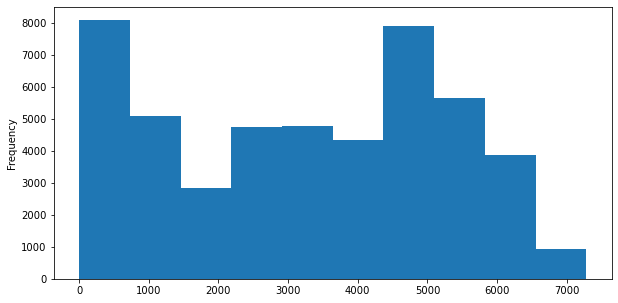

In [7]:
plt.figure(figsize = (10,5))
df["traffic_volume"].plot.hist()
plt.show()

Use **`df["traffic_volume"].describe()`** to look up a few statistics about the **`traffic_volume`** column

In [8]:
df["traffic_volume"].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

Between 2012-10-02 09:00:00 and 2018-09-30 23:00:00 the hourly traffic volume varied from 0 to 7280 cars, with an average of 3260 cars.

About 25% of the time, there were only 1193 cars or fewer passing the station each hour -this probably occurs during the night, or when a road is under construction. Howewer, about 25% of the time, the traffic volume 

## Influence of the hourly in the Traffic Volume

We'll start by dividing the dataset into two parts:

    - Daytime data: hours from 7 a.m. to 7 p.m.
    - Nighttime data: hours from 7 p.m. to 7 a.m.

While this is not a perfect criterion for distinguishing between nighttime and daytime, it's a good starter point

Transform the `date_time` column to `datetime` by using the function **`pd.to_datetime()`**

In [9]:
df["date_time"] = pd.to_datetime(df["date_time"])

In [10]:
df_copy_nighttime = df.copy()[(df["date_time"].dt.hour < 7) | (df["date_time"].dt.hour >= 19)]

In [11]:
df_copy_daytime = df.copy()[(df["date_time"].dt.hour >= 7) & (df["date_time"].dt.hour < 19)]

Now we're going to compare the traffic volume at night and during day

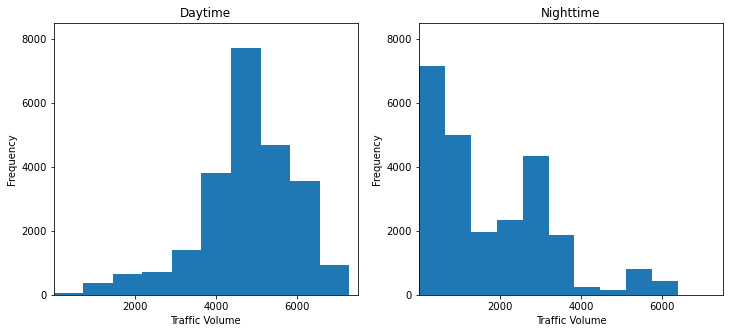

In [12]:
plt.figure(figsize = (12,5))  #Incease the size of the entire figure plt.figure(figsize = (width,height))
plt.subplot(1,2,1)
plt.title("Daytime")

ax1 = df_copy_daytime["traffic_volume"].plot.hist()

plt.ylim((0,8500))
plt.xlim((0,7500))
ax1.set_yticks([0,2000,4000,6000,8000])
ax1.set_xticks([2000,4000,6000])

plt.xlabel("Traffic Volume")
plt.subplot(1,2,2)
plt.title("Nighttime")
ax2 = df_copy_nighttime["traffic_volume"].plot.hist()

ax2.set_yticks([0,2000,4000,6000,8000])
ax2.set_xticks([2000,4000,6000])
plt.ylim((0,8500))
plt.xlim((0,7500))
plt.xlabel("Traffic Volume")
plt.show()

In [13]:
df_copy_daytime["traffic_volume"].describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [14]:
df_copy_nighttime["traffic_volume"].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

The histogram that shows the distribution of the traffic volume during the day is left skewed. This means that that the most of the traffic volume values are high.

The histogram that shows the distribution of the traffic volume during the day is right skewed. This means that that the most of the traffic volume values are low.

Our goal is to find indicators of heavy traffic, so we'll only focus on the daytime data moving forward.

We're going to look at few line plots showing how the traffic volume changed according to the following parameters:

    - Month
    - Day of the week
    - Time of day

## Traffic volume changed according to the Month

In [15]:
df_copy_daytime['month'] = df_copy_daytime['date_time'].dt.month
by_month = df_copy_daytime.groupby('month').mean()
by_month['traffic_volume']

month
1     4495.613727
2     4711.198394
3     4889.409560
4     4906.894305
5     4911.121609
6     4898.019566
7     4595.035744
8     4928.302035
9     4870.783145
10    4921.234922
11    4704.094319
12    4374.834566
Name: traffic_volume, dtype: float64

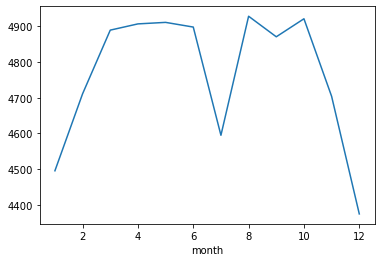

In [16]:
by_month["traffic_volume"].plot();

### Analyzing the last graph

Since January to June we can appreciate an increase in the traffic volume, but suddenly in July there a decrease of 300 cars in the average respect to June. In August increase again the traffic volume value and again in November to Decemeber period there are a decreasing of this value

## Traffic volume changed according to the day of the week


In [17]:
df_copy_daytime["dayofweek"] = df_copy_daytime["date_time"].dt.dayofweek
by_dayofweek = df_copy_daytime.groupby("dayofweek").mean() 
by_dayofweek["traffic_volume"]

dayofweek
0    4893.551286
1    5189.004782
2    5284.454282
3    5311.303730
4    5291.600829
5    3927.249558
6    3436.541789
Name: traffic_volume, dtype: float64

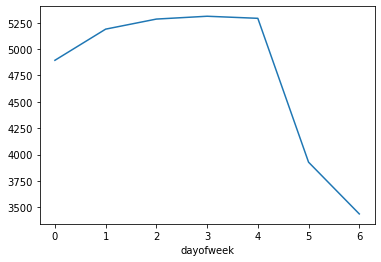

In [18]:
by_dayofweek["traffic_volume"].plot();

### Analyzing the last graph

The traffic volume is significantly heavier on bussiness days compared to the weekends

## Traffic volume changed according to the Time of day

We'll now generate a line plot for the time of the day. The weekends, however will drag down the average values, so we're going to look at the averages separately. To do that we'll be start by splitting the data based on the day type: business day or weekend.

In [19]:
df_copy_daytime['hour'] = df_copy_daytime["date_time"].dt.hour
business_days = df_copy_daytime.copy()[df_copy_daytime["dayofweek"] <= 4] #4 == Friday
weekend = df_copy_daytime.copy()[df_copy_daytime["dayofweek"] > 4] #4 == Friday

by_hour_business = business_days.groupby("hour").mean() 
by_hour_weekend = weekend.groupby("hour").mean() 

In [20]:
by_hour_business['traffic_volume']

hour
7     6030.413559
8     5503.497970
9     4895.269257
10    4378.419118
11    4633.419470
12    4855.382143
13    4859.180473
14    5152.995778
15    5592.897768
16    6189.473647
17    5784.827133
18    4434.209431
Name: traffic_volume, dtype: float64

In [21]:
by_hour_weekend['traffic_volume']

hour
7     1589.365894
8     2338.578073
9     3111.623917
10    3686.632302
11    4044.154955
12    4372.482883
13    4362.296564
14    4358.543796
15    4342.456881
16    4339.693805
17    4151.919929
18    3811.792279
Name: traffic_volume, dtype: float64

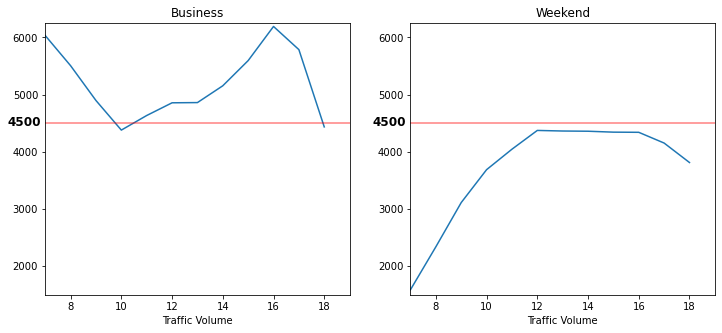

In [22]:
plt.figure(figsize = (12,5))  #Incease the size of the entire figure plt.figure(figsize = (width,height))
plt.subplot(1,2,1)
plt.title("Business")

ax1 = by_hour_business["traffic_volume"].plot()

plt.ylim((1500,6250))
plt.xlim((7,19))
ax1.axhline(y=4500,c='r',alpha=0.5)

ax1.text(x=5.5,y=4450,s='4500',weight='bold',size=12,color="k")

plt.xlabel("Traffic Volume")
plt.subplot(1,2,2)
plt.title("Weekend")
ax2 = by_hour_weekend["traffic_volume"].plot()
ax2.text(x=5.5,y=4450,s='4500',weight='bold',size=12,color="k")
ax2.axhline(y=4500,c='r',alpha=0.5)
plt.ylim((1500,6250))
plt.xlim((7,19))
plt.xlabel("Traffic Volume")
plt.show()

So far, we've focused on finding time indicators for heavy traffic, and we reached the following conclusions:
- The traffic is usually heavier during warm months (March - October) compared to cold months (November - Febraury)
- The traffic is usually heavier on business days compared to weekends.
- On business days, the rush hours are around 7 and 16.

## Correlation between traffic_volume and weather

In [23]:
df_copy_daytime.corr()["traffic_volume"]

temp              0.128317
rain_1h           0.003697
snow_1h           0.001265
clouds_all       -0.032932
traffic_volume    1.000000
month            -0.022337
dayofweek        -0.416453
hour              0.172704
Name: traffic_volume, dtype: float64

The weather column with the strongest correlation with `traffic_volume` is `temp`.

Let's generate a scatter plot to visualize the correlation between `traffic_volume` and `temp`.

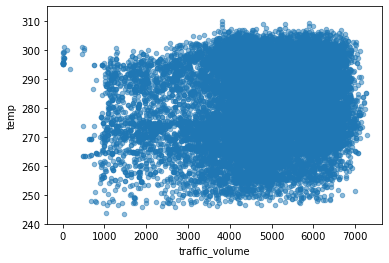

In [24]:
df_copy_daytime.plot.scatter("traffic_volume","temp",alpha=0.5)
plt.ylim(240,315)
plt.show()

We can conclude that temperature doesn't look like a solid indicator of heavy traffic.

To see if we can find more useful data, we'll look next at the categorical weather-related columns `weather_main` and `weather_description`: 

In [25]:
by_weather_main = df_copy_daytime.groupby('weather_main').mean()
by_weather_description = df_copy_daytime.groupby('weather_description').mean()

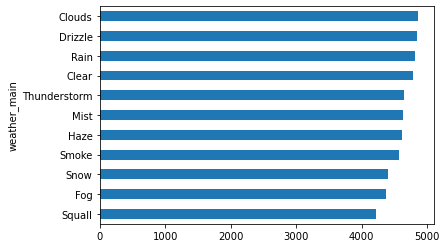

In [26]:
by_weather_main["traffic_volume"].sort_values().plot.barh()
plt.show()

There are not any traffic volume exceeding 5000 cars.

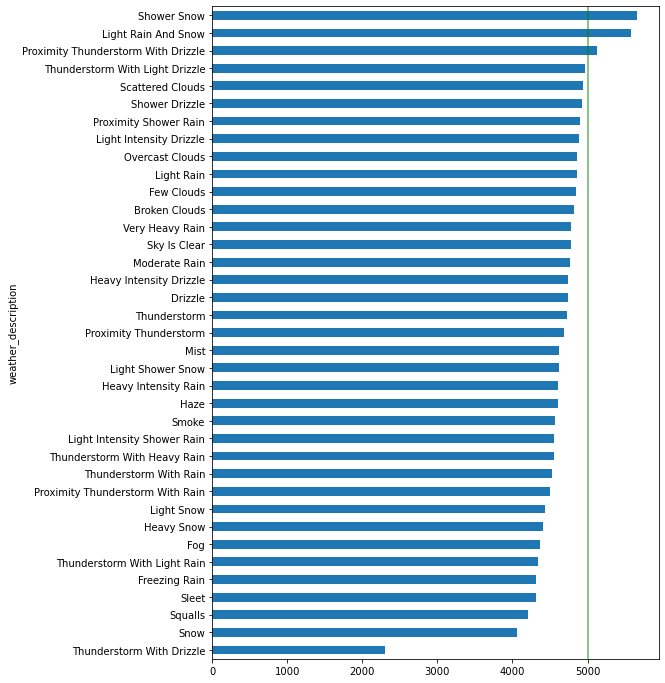

In [27]:
fig = plt.figure(figsize=(8,12))
ax = by_weather_description["traffic_volume"].sort_values().plot.barh()
ax.axvline(x=5000,c='g',alpha=0.6)
plt.show()

Weather indicators (daytime):
- Shower snow
- Light rain and snow
- Proximity thunderstorm with drizzle

In [28]:
df_copy_nighttime.corr()["traffic_volume"]

temp              0.094004
rain_1h          -0.012972
snow_1h          -0.007453
clouds_all        0.012832
traffic_volume    1.000000
Name: traffic_volume, dtype: float64

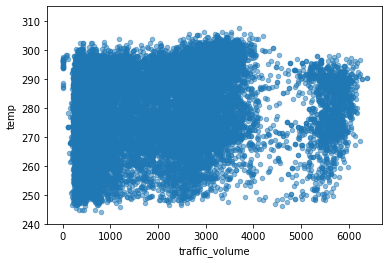

In [29]:
df_copy_nighttime.plot.scatter("traffic_volume","temp",alpha=0.5)
plt.ylim(240,315)
plt.show()

In [30]:
by_weather_main_night = df_copy_nighttime.groupby('weather_main').mean()
by_weather_description_night = df_copy_nighttime.groupby('weather_description').mean()

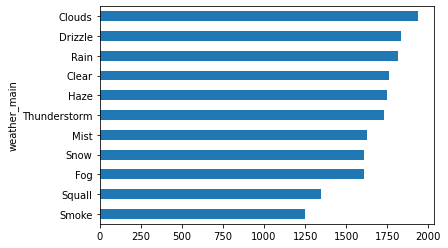

In [31]:
by_weather_main_night["traffic_volume"].sort_values().plot.barh()
plt.show()

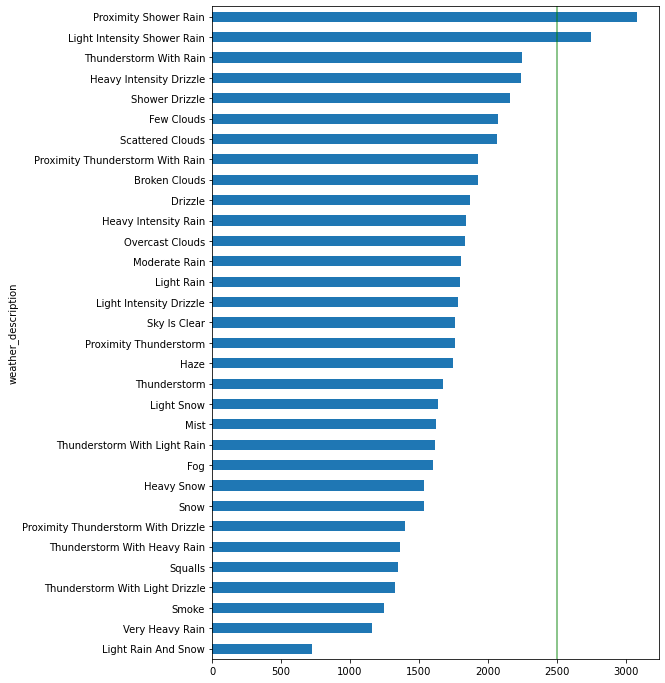

In [32]:
fig = plt.figure(figsize=(8,12))
ax = by_weather_description_night["traffic_volume"].sort_values().plot.barh()
ax.axvline(x=2500,c='g',alpha=0.6)
plt.show()

Weather indicators (nighttime):
- Proximity shower rain
- Light intensity shower rain

# Conclusions

In this project, we tried to find a few indicators of heavy traffic on the **I-94 Interstate** highway. We managed to find two types of indicators.

1. Time indicators:
- The traffic is usually heavier during warm months (March - October) compared to cold months (November - Febraury)
- The traffic is usually heavier on business days compared to weekends.
- On business days, the rush hours are around 7 and 16.
2. Weather indicators (daytime):
    - Shower snow
    - Light rain and snow
    - Proximity thunderstorm with drizzle
3. Weather indicators (nighttime):
- Proximity shower rain
- Light intensity shower rain